## Deadline

Wednesday, November 22, 2017, 11:59PM

## Important notes

- When you push your Notebook to GitHub, all the cells must already have been evaluated.
- Don't forget to add a textual description of your thought process and of any assumptions you've made.
- Please write all your comments in English, and use meaningful variable names in your code.

## Question 1: Propensity score matching

In this exercise, you will apply [propensity score matching](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf), which we discussed in lecture 5 ("Observational studies"), in order to draw conclusions from an observational study.

We will work with a by-now classic dataset from Robert LaLonde's study "[Evaluating the Econometric Evaluations of Training Programs](http://people.hbs.edu/nashraf/LaLonde_1986.pdf)" (1986).
The study investigated the effect of a job training program ("National Supported Work Demonstration") on the real earnings of an individual, a couple of years after completion of the program.
Your task is to determine the effectiveness of the "treatment" represented by the job training program.

#### Dataset description

- `treat`: 1 if the subject participated in the job training program, 0 otherwise
- `age`: the subject's age
- `educ`: years of education
- `race`: categorical variable with three possible values: Black, Hispanic, or White
- `married`: 1 if the subject was married at the time of the training program, 0 otherwise
- `nodegree`: 1 if the subject has earned no school degree, 0 otherwise
- `re74`: real earnings in 1974 (pre-treatment)
- `re75`: real earnings in 1975 (pre-treatment)
- `re78`: real earnings in 1978 (outcome)

If you want to brush up your knowledge on propensity scores and observational studies, we highly recommend Rosenbaum's excellent book on the ["Design of Observational Studies"](http://www.stewartschultz.com/statistics/books/Design%20of%20observational%20studies.pdf). Even just reading the first chapter (18 pages) will help you a lot.

#### 1. A naive analysis

Compare the distribution of the outcome variable (`re78`) between the two groups, using plots and numbers.
To summarize and compare the distributions, you may use the techniques we discussed in lectures 4 ("Read the stats carefully") and 6 ("Data visualization").

What might a naive "researcher" conclude from this superficial analysis?

#### 2. A closer look at the data

You're not naive, of course (and even if you are, you've learned certain things in ADA), so you aren't content with a superficial analysis such as the above.
You're aware of the dangers of observational studies, so you take a closer look at the data before jumping to conclusions.

For each feature in the dataset, compare its distribution in the treated group with its distribution in the control group, using plots and numbers.
As above, you may use the techniques we discussed in class for summarizing and comparing the distributions.

What do you observe?
Describe what your observations mean for the conclusions drawn by the naive "researcher" from his superficial analysis.

#### 3. A propensity score model

Use logistic regression to estimate propensity scores for all points in the dataset.
You may use `sklearn` to fit the logistic regression model and apply it to each data point to obtain propensity scores:

```python
from sklearn import linear_model
logistic = linear_model.LogisticRegression()
```

Recall that the propensity score of a data point represents its probability of receiving the treatment, based on its pre-treatment features (in this case, age, education, pre-treatment income, etc.).
To brush up on propensity scores, you may read chapter 3.3 of the above-cited book by Rosenbaum or [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).

Note: you do not need a train/test split here. Train and apply the model on the entire dataset. If you're wondering why this is the right thing to do in this situation, recall that the propensity score model is not used in order to make predictions about unseen data. Its sole purpose is to balance the dataset across treatment groups.
(See p. 74 of Rosenbaum's book for an explanation why slight overfitting is even good for propensity scores.
If you want even more information, read [this article](https://drive.google.com/file/d/0B4jctQY-uqhzTlpBaTBJRTJFVFE/view).)

#### 4. Balancing the dataset via matching

Use the propensity scores to match each data point from the treated group with exactly one data point from the control group, while ensuring that each data point from the control group is matched with at most one data point from the treated group.
(Hint: you may explore the `networkx` package in Python for predefined matching functions.)

Your matching should maximize the similarity between matched subjects, as captured by their propensity scores.
In other words, the sum (over all matched pairs) of absolute propensity-score differences between the two matched subjects should be minimized.

After matching, you have as many treated as you have control subjects.
Compare the outcomes (`re78`) between the two groups (treated and control).

Also, compare again the feature-value distributions between the two groups, as you've done in part 2 above, but now only for the matched subjects.
What do you observe?
Are you closer to being able to draw valid conclusions now than you were before?


#### 5. Balancing the groups further

Based on your comparison of feature-value distributions from part 4, are you fully satisfied with your matching?
Would you say your dataset is sufficiently balanced?
If not, in what ways could the "balanced" dataset you have obtained still not allow you to draw valid conclusions?

Improve your matching by explicitly making sure that you match only subjects that have the same value for the problematic feature.
Argue with numbers and plots that the two groups (treated and control) are now better balanced than after part 4.


#### 6. A less naive analysis

Compare the outcomes (`re78`) between treated and control subjects, as you've done in part 1, but now only for the matched dataset you've obtained from part 5.
What do you conclude about the effectiveness of the job training program?


___

## Question 2: Applied ML

We are going to build a classifier of news to directly assign them to 20 news categories. Note that the pipeline that you will build in this exercise could be of great help during your project if you plan to work with text!

1. Load the 20newsgroup dataset. It is, again, a classic dataset that can directly be loaded using sklearn ([link](http://scikit-learn.org/stable/datasets/twenty_newsgroups.html)).  
[TF-IDF](https://en.wikipedia.org/wiki/Tf%E2%80%93idf), short for term frequency–inverse document frequency, is of great help when if comes to compute textual features. Indeed, it gives more importance to terms that are more specific to the considered articles (TF) but reduces the importance of terms that are very frequent in the entire corpus (IDF). Compute TF-IDF features for every article using [TfidfVectorizer](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html). Then, split your dataset into a training, a testing and a validation set (10% for validation and 10% for testing). Each observation should be paired with its corresponding label (the article category).


2. Train a random forest on your training set. Try to fine-tune the parameters of your predictor on your validation set using a simple grid search on the number of estimator "n_estimators" and the max depth of the trees "max_depth". Then, display a confusion matrix of your classification pipeline. Lastly, once you assessed your model, inspect the `feature_importances_` attribute of your random forest and discuss the obtained results.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report
from sklearn.preprocessing import OneHotEncoder
from pandas.plotting import scatter_matrix
from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score
import seaborn as sns
import networkx as nx
%matplotlib inline
plt.style.use('bmh')

## Question 1

### 1. A naive analysis

First, let's read the data into dataframe and take a look at it.

In [2]:
df = pd.read_csv('lalonde.csv')
df.head()

,id,treat,age,educ,black,hispan,married,nodegree,re74,re75,re78
0,NSW1,1,37,11,1,0,1,1,0.0,0.0,9930.0460
1,NSW2,1,22,9,0,1,0,1,0.0,0.0,3595.8940
2,NSW3,1,30,12,1,0,0,0,0.0,0.0,24909.4500
3,NSW4,1,27,11,1,0,0,1,0.0,0.0,7506.1460
4,NSW5,1,33,8,1,0,0,1,0.0,0.0,289.7899


Now, let's split our dataset in two new datasets. One for treated group and one for not treated.

In [3]:
treated = df[df['treat']==1]
not_treated = df[df['treat']==0]

We will now compare these two groups by performing some statistical analysis and ploting some histograms.

In [4]:
#describe feature 're78' for each group and concatenate the results
descriptions = pd.concat((not_treated[['re78']].describe(), treated[['re78']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,429.000000,185.000000
mean,6984.169742,6349.143530
std,7294.161791,7867.402218
min,0.000000,0.000000
25%,220.181300,485.229800
50%,4975.505000,4232.309000
75%,11688.820000,9642.999000
max,25564.670000,60307.930000


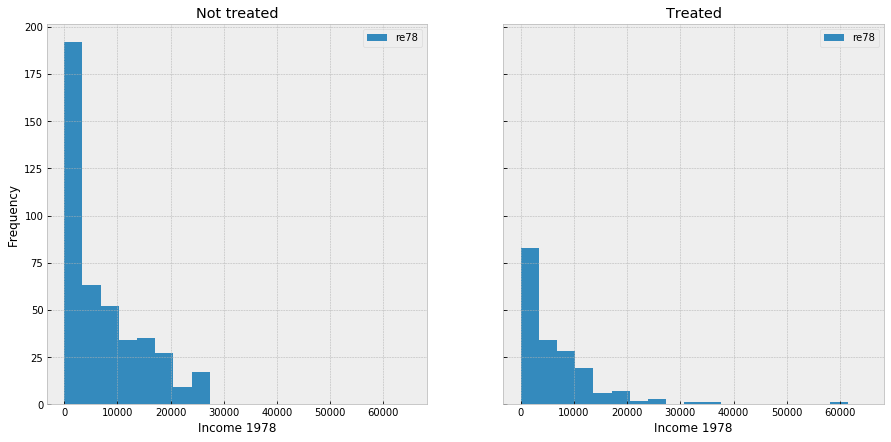

In [5]:
#configuration to plot two histograms in one column for easier comparation
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Income 1978')
axes[1].set_xlabel('Income 1978')
not_treated[['re78']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[0], title='Not treated')
treated[['re78']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[1], title='Treated')

**Conclusion**: As a naive "researcher" we can conclude that the training program doesn't influence on income and that the results are very similar. If we look at the numbers, mean income for not treated group is higher than for treated group, so a naive "researcher" can even conclude that training program has a negative influence on income. But of course, this is not completly true, we have a lot of outliers, and the biggest problem is that we have much more people in not treated group.

### 2. A closer look at the data

Now, let's plot all features for both groups and compare them.

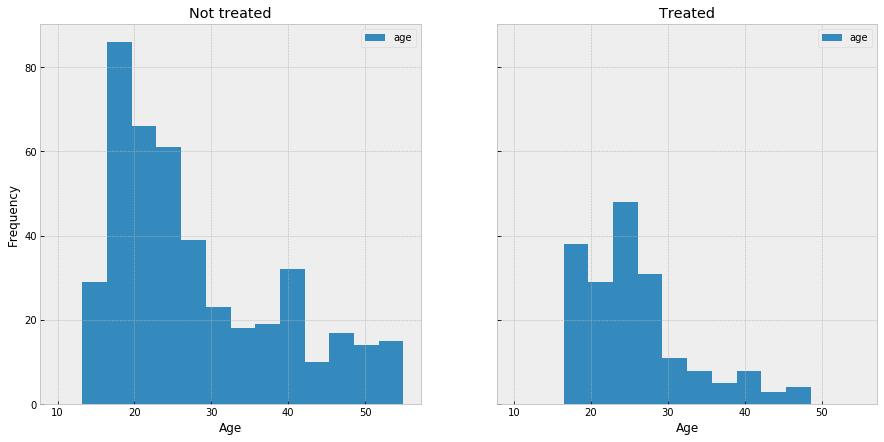

In [6]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Age')
axes[1].set_xlabel('Age')
not_treated[['age']].plot(kind='hist', bins=np.linspace(10, 55, 15), ax=axes[0], title='Not treated')
treated[['age']].plot(kind='hist', bins=np.linspace(10, 55, 15), ax=axes[1], title='Treated')

In [7]:
#describe feature 'age' for each group and concatenate the results
descriptions = pd.concat((not_treated[['age']].describe(), treated[['age']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,429.000000,185.000000
mean,28.030303,25.816216
std,10.786653,7.155019
min,16.000000,17.000000
25%,19.000000,20.000000
50%,25.000000,25.000000
75%,35.000000,29.000000
max,55.000000,48.000000


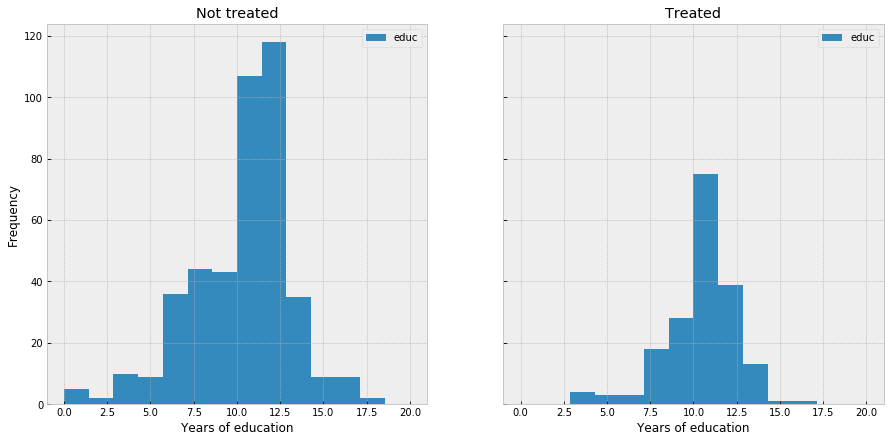

In [8]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Years of education')
axes[1].set_xlabel('Years of education')
not_treated[['educ']].plot(kind='hist', bins=np.linspace(0, 20, 15), ax=axes[0], title='Not treated')
treated[['educ']].plot(kind='hist', bins=np.linspace(0, 20, 15), ax=axes[1], title='Treated')

In [9]:
#describe feature 'educ' for each group and concatenate the results
descriptions = pd.concat((not_treated[['educ']].describe(), treated[['educ']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,429.000000,185.000000
mean,10.235431,10.345946
std,2.855238,2.010650
min,0.000000,4.000000
25%,9.000000,9.000000
50%,11.000000,11.000000
75%,12.000000,12.000000
max,18.000000,16.000000


[Text(0,0,'black'), Text(0,0,'hispan'), Text(0,0,'white')]

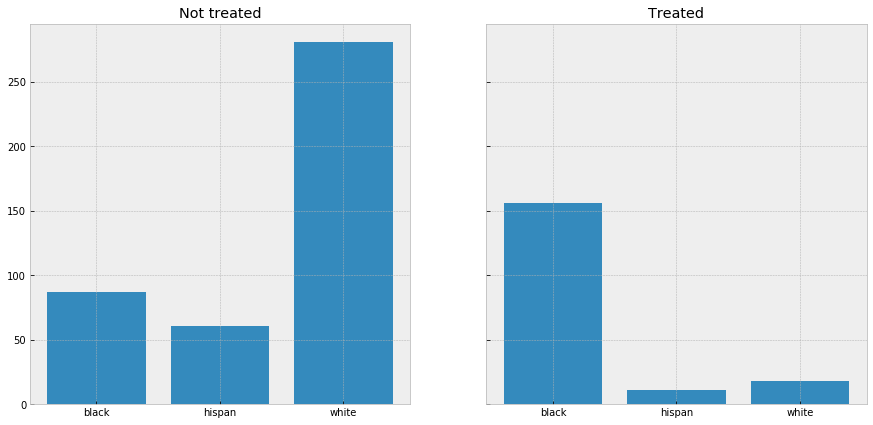

In [10]:
black = not_treated[not_treated['black']==1]['black'].count()
hispan = not_treated[not_treated['hispan']==1]['hispan'].count()
#we are counting black with zero, those are white, because we previously filtered all the blacks and hispans
white = not_treated[(not_treated['black']==0) & (not_treated['hispan']==0)]['black'].count()

black_tr = treated[treated['black']==1]['black'].count()
hispan_tr = treated[treated['hispan']==1]['hispan'].count()
white_tr = treated[(treated['black']==0) & (treated['hispan']==0)]['black'].count()

N = 3
ind = np.arange(N)
race_val = [black, hispan, white]
race_val_tr = [black_tr, hispan_tr, white_tr]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].bar(ind, race_val)
axes[0].set_title('Not treated')
axes[0].set_xticks(ind)
axes[0].set_xticklabels(('black', 'hispan', 'white'))
axes[1].bar(ind, race_val_tr)
axes[1].set_title('Treated')
axes[1].set_xticks(ind)
axes[1].set_xticklabels(('black', 'hispan', 'white'))

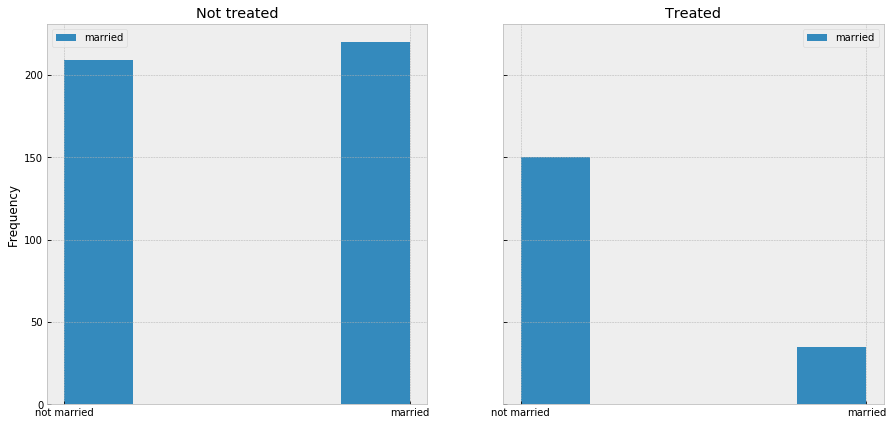

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
N = 2
ind = np.arange(N)
axes[0].set_xticks(ind)
axes[0].set_xticklabels(('not married', 'married'))
axes[1].set_xticks(ind)
axes[1].set_xticklabels(('not married', 'married'))
not_treated[['married']].plot(kind='hist', bins=5, ax=axes[0], title='Not treated')
treated[['married']].plot(kind='hist', bins=5, ax=axes[1], title='Treated')

In [12]:
#describe feature 'married' for each group and concatenate the results
descriptions = pd.concat((not_treated[['married']].describe(), treated[['married']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,429.000000,185.000000
mean,0.512821,0.189189
std,0.500419,0.392722
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,0.000000
75%,1.000000,0.000000
max,1.000000,1.000000


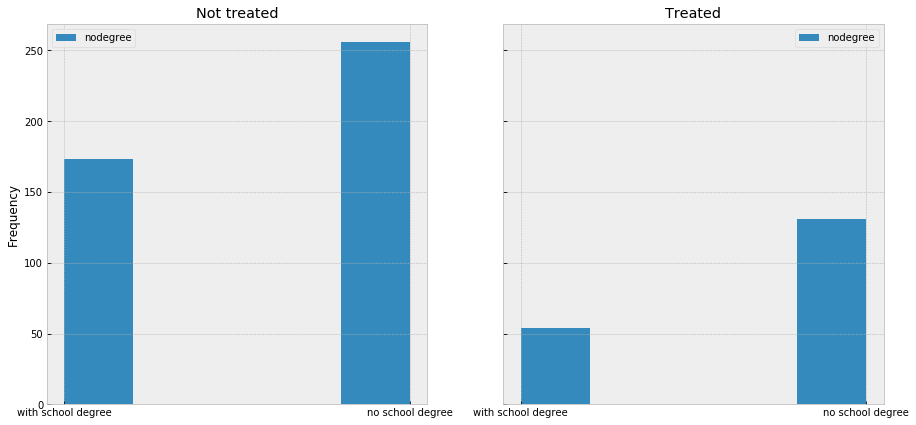

In [13]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
N = 2
ind = np.arange(N)
axes[0].set_xticks(ind)
axes[0].set_xticklabels(('with school degree', 'no school degree'))
axes[1].set_xticks(ind)
axes[1].set_xticklabels(('with school degree', 'no school degree'))
not_treated[['nodegree']].plot(kind='hist', bins=5, ax=axes[0], title='Not treated')
treated[['nodegree']].plot(kind='hist', bins=5, ax=axes[1], title='Treated')

In [14]:
#describe feature 'nodegree' for each group and concatenate the results
descriptions = pd.concat((not_treated[['nodegree']].describe(), treated[['nodegree']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,429.000000,185.000000
mean,0.596737,0.708108
std,0.491126,0.455867
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1.000000,1.000000
75%,1.000000,1.000000
max,1.000000,1.000000


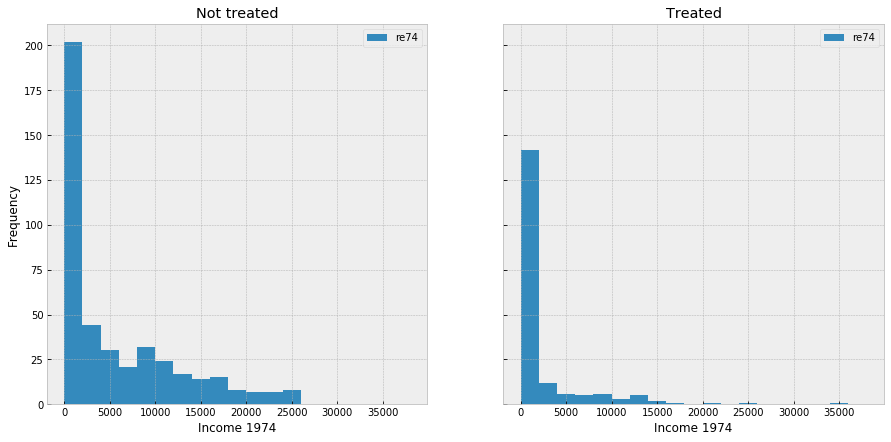

In [15]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Income 1974')
axes[1].set_xlabel('Income 1974')
not_treated[['re74']].plot(kind='hist', bins=np.linspace(0, 38000, 20), ax=axes[0], title='Not treated')
treated[['re74']].plot(kind='hist', bins=np.linspace(0, 38000, 20), ax=axes[1], title='Treated')

In [16]:
#describe feature 're74' for each group and concatenate the results
descriptions = pd.concat((not_treated[['re74']].describe(), treated[['re74']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,429.000000,185.000000
mean,5619.236506,2095.573689
std,6788.750796,4886.620353
min,0.000000,0.000000
25%,0.000000,0.000000
50%,2547.047000,0.000000
75%,9277.128000,1291.468000
max,25862.320000,35040.070000


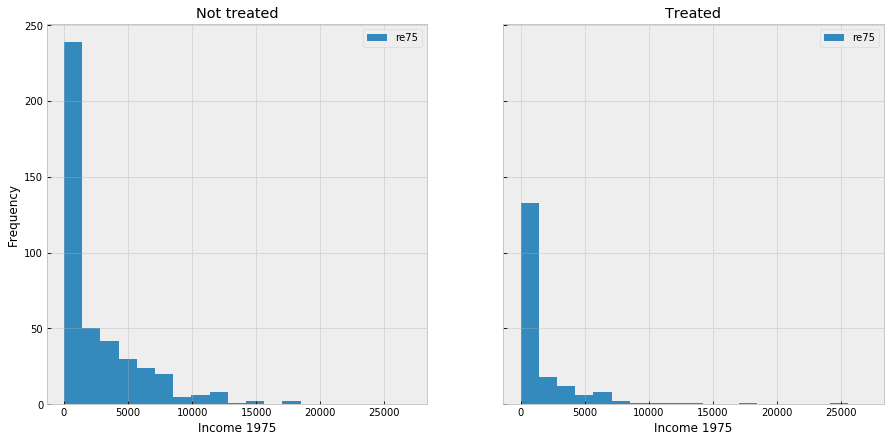

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Income 1975')
axes[1].set_xlabel('Income 1975')
not_treated[['re75']].plot(kind='hist', bins=np.linspace(0, 27000, 20), ax=axes[0], title='Not treated')
treated[['re75']].plot(kind='hist', bins=np.linspace(0, 27000, 20), ax=axes[1], title='Treated')

In [18]:
#describe feature 're75' for each group and concatenate the results
descriptions = pd.concat((not_treated[['re75']].describe(), treated[['re75']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,429.000000,185.000000
mean,2466.484443,1532.055314
std,3291.996183,3219.250870
min,0.000000,0.000000
25%,0.000000,0.000000
50%,1086.726000,0.000000
75%,3881.419000,1817.284000
max,18347.230000,25142.240000


**Conclusion**: We can see that age for both groups is very similar. Of course the frequency is higher for not treated group, but the trending is the same. For years of education we can say the same. Then the biggest difference in the two groups is race. We can see how this feature is unbalanced, because most of the people in treated group are black, while in the not treated group most of the people are white. If we look now at the married feature, we can see that in not treated group number of married is almost the same as the number of not married, but in the treated group majority of people is not married. For school degree, we can see similar trending for both groups. In the end, if look at income, we can see that is not fitted very well between two groups. All this analysis can show us that the samples are poorly selected because there is too much diversity between these two groups in terms of features. So we need to make further analysis if we want to make a proper conclusion.

### 3. A propensity score model

Input features for our model are: 'age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75'. 

're78' is not a feature, because it is not a pre-treatment income. 

Let's create the model.

In [39]:
logistic = LogisticRegression(penalty='l1')

x = df[['age', 'educ', 'black', 'hispan', 'married', 'nodegree', 're74', 're75']]
y = df['treat']

model = logistic.fit(x, y)
y_pred = logistic.predict(x)
print(classification_report(y, y_pred))

             precision    recall  f1-score   support

          0       0.90      0.85      0.87       429
          1       0.68      0.77      0.73       185

avg / total       0.83      0.82      0.83       614



Now, let's calculate the probabilities(this is the propensity score).

In [40]:
#probability of receiving the treatment for each data point
probabilities = model.predict_proba(x)
probabilities

array([[ 0.41854641,  0.58145359],
       [ 0.8000712 ,  0.1999288 ],
       [ 0.31374153,  0.68625847],
       ..., 
       [ 0.83977495,  0.16022505],
       [ 0.54575357,  0.45424643],
       [ 0.88811649,  0.11188351]])

### 4. Balancing the dataset via matching

We will use networkx library to create a graph, so we can easily compute the best pairs from two groups.

In [41]:
probs = probabilities[:,1]

G = nx.Graph()

treat_idx = np.where(df['treat'] == 1)[0]
no_treat_idx = np.where(df['treat'] == 0)[0]

#this can take a while
for idx_t in treat_idx:
    for idx_n in no_treat_idx:
        w = 1 - np.abs(probs[idx_t] - probs[idx_n])
        G.add_weighted_edges_from([(idx_t, idx_n, w)])

#this will calculate the best pairs(pairs with highest wieght)
#it will return duplicate pairs(for example it will return both 1:320 and 320:1) so we need only the first half
pairs = nx.max_weight_matching(G)

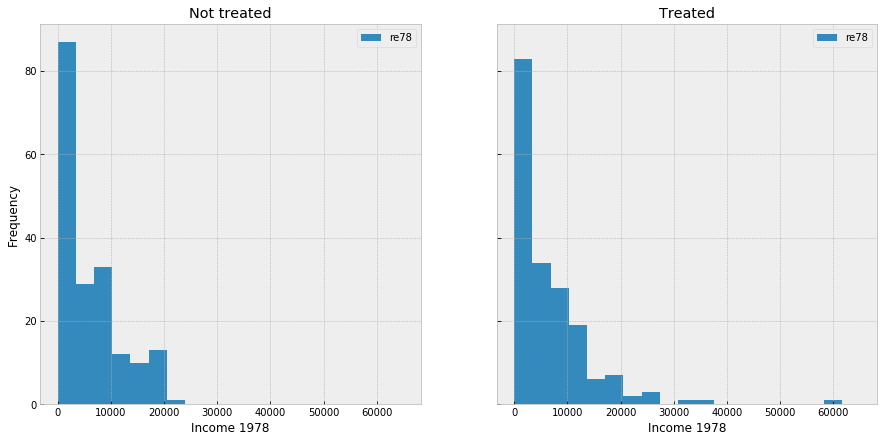

In [42]:
#we sort the list and take first 185 elements, because the first 185 elements are those in treated group
#so we get here their best pairs
items = sorted(list(pairs.items()))[:185]

not_treated_matching = df.loc[[i[1] for i in items]]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Income 1978')
axes[1].set_xlabel('Income 1978')
not_treated_matching[['re78']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[0], title='Not treated')
treated[['re78']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[1], title='Treated')

In [43]:
descriptions = pd.concat((not_treated_matching[['re78']].describe(), treated[['re78']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,185.000000,185.000000
mean,5707.930526,6349.143530
std,5909.314764,7867.402218
min,0.000000,0.000000
25%,187.671300,485.229800
50%,4112.513000,4232.309000
75%,8923.991000,9642.999000
max,23764.800000,60307.930000


Now, if we compare earnings for these two groups, we can see that the treated group has higher income, maybe the matching is still not perfect because we still have some outliers and the standard deviation is higher for treated group, but it looks like we are on right track and we have better comparation than in part 1.

In [44]:
#function to draw all features plots
def plot_all(treated, not_treated_matching):
    fig, axes = plt.subplots(nrows=7, ncols=2, figsize=(15, 50), sharex=False, sharey=True)

    axes[0][0].set_xlabel('Age')
    axes[0][1].set_xlabel('Age')
    not_treated_matching[['age']].plot(kind='hist', bins=np.linspace(10, 55, 15), ax=axes[0][0], title='Not treated')
    treated[['age']].plot(kind='hist', bins=np.linspace(10, 55, 15), ax=axes[0][1], title='Treated')

    axes[1][0].set_xlabel('Years of education')
    axes[1][1].set_xlabel('Years of education')
    not_treated_matching[['educ']].plot(kind='hist', bins=np.linspace(0, 20, 15), ax=axes[1][0], title='Not treated')
    treated[['educ']].plot(kind='hist', bins=np.linspace(0, 20, 15), ax=axes[1][1], title='Treated')

    black = not_treated_matching[not_treated_matching['black']==1]['black'].count()
    hispan = not_treated_matching[not_treated_matching['hispan']==1]['hispan'].count()
    white = not_treated_matching[(not_treated_matching['black']==0) & (not_treated_matching['hispan']==0)]['black'].count()

    black_tr = treated[treated['black']==1]['black'].count()
    hispan_tr = treated[treated['hispan']==1]['hispan'].count()
    white_tr = treated[(treated['black']==0) & (treated['hispan']==0)]['black'].count()

    N = 3
    ind = np.arange(N)
    race_val = [black, hispan, white]
    race_val_tr = [black_tr, hispan_tr, white_tr]

    axes[2][0].bar(ind, race_val)
    axes[2][0].set_title('Not treated')
    axes[2][0].set_xticks(ind)
    axes[2][0].set_xticklabels(('black', 'hispan', 'white'))
    axes[2][1].bar(ind, race_val_tr)
    axes[2][1].set_title('Treated')
    axes[2][1].set_xticks(ind)
    axes[2][1].set_xticklabels(('black', 'hispan', 'white'))

    N = 2
    ind = np.arange(N)
    axes[3][0].set_xticks(ind)
    axes[3][0].set_xticklabels(('not married', 'married'))
    axes[3][1].set_xticks(ind)
    axes[3][1].set_xticklabels(('not married', 'married'))
    not_treated_matching[['married']].plot(kind='hist', bins=5, ax=axes[3][0], title='Not treated')
    treated[['married']].plot(kind='hist', bins=5, ax=axes[3][1], title='Treated')

    axes[4][0].set_xticks(ind)
    axes[4][0].set_xticklabels(('with school degree', 'no school degree'))
    axes[4][1].set_xticks(ind)
    axes[4][1].set_xticklabels(('with school degree', 'no school degree'))
    not_treated_matching[['nodegree']].plot(kind='hist', bins=5, ax=axes[4][0], title='Not treated')
    treated[['nodegree']].plot(kind='hist', bins=5, ax=axes[4][1], title='Treated')

    axes[5][0].set_xlabel('Income 1974')
    axes[5][1].set_xlabel('Income 1974')
    not_treated_matching[['re74']].plot(kind='hist', bins=np.linspace(0, 38000, 20), ax=axes[5][0], title='Not treated')
    treated[['re74']].plot(kind='hist', bins=np.linspace(0, 38000, 20), ax=axes[5][1], title='Treated')

    axes[6][0].set_xlabel('Income 1975')
    axes[6][1].set_xlabel('Income 1975')
    not_treated_matching[['re75']].plot(kind='hist', bins=np.linspace(0, 27000, 20), ax=axes[6][0], title='Not treated')
    treated[['re75']].plot(kind='hist', bins=np.linspace(0, 27000, 20), ax=axes[6][1], title='Treated')

Now, let's compare all the features again.

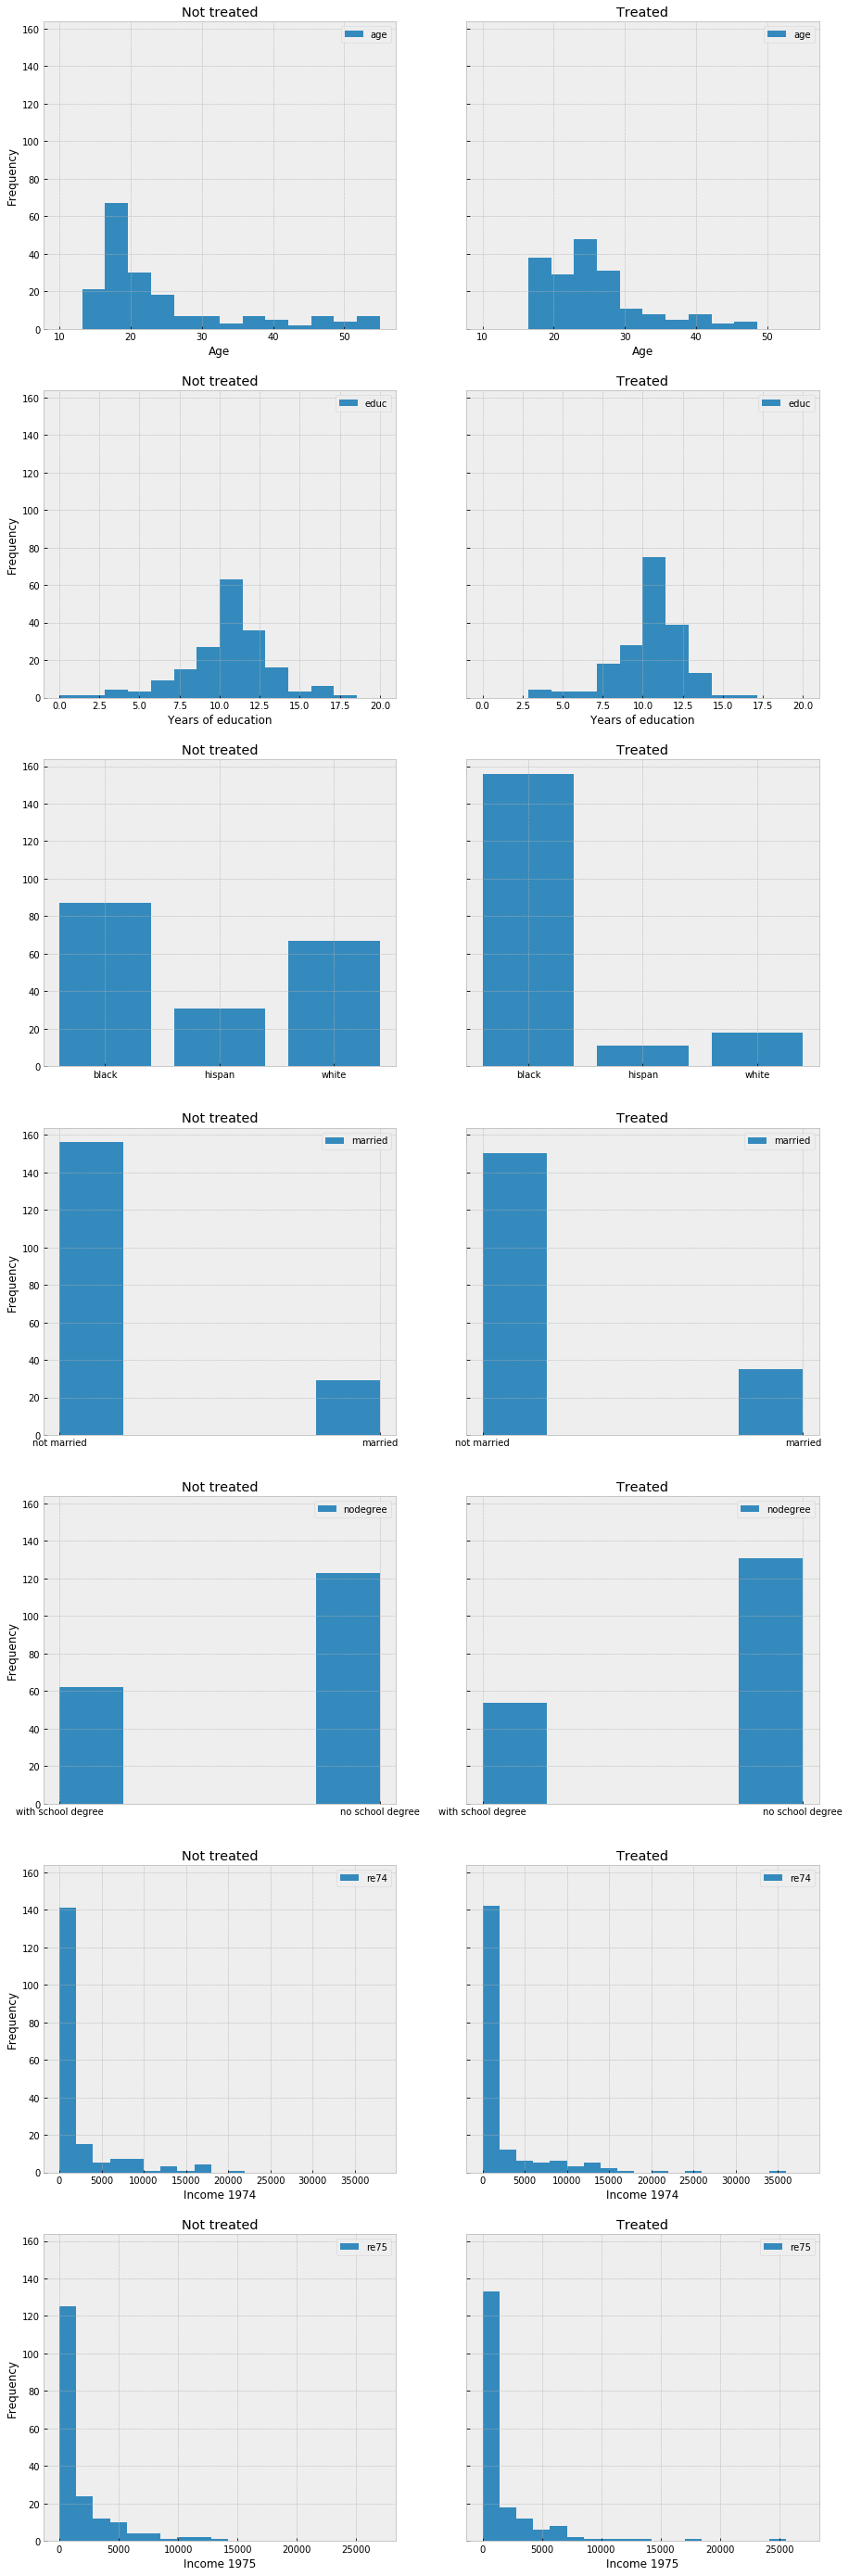

In [45]:
plot_all(treated, not_treated_matching)

**Conclusion**: If we look at comparison now, the matches are not perfect yet, the same case as we mentioned above for the incomes. But we can see some improvements, especially for features 'married' and 'nodegree'.

### 5. Balancing the groups further

In order to improve our matching we will try to improve it by matching only subjects that have the same value for the problematic feature. Looking at the plots above, we can see that the race is still the biggest problem, especially black. So we will improve our matching by matching the black feature, but because of this, we will have less number of pairs, but we hope it will still be enough to get better results.

In [46]:
G_2 = nx.Graph()

#this can take a while
for idx_t in treat_idx:
    for idx_n in no_treat_idx:
        if df.loc[idx_t, 'black'] == df.loc[idx_n, 'black']:
            w = 1 - np.abs(probs[idx_t] - probs[idx_n])
            G_2.add_weighted_edges_from([(idx_t, idx_n, w)])
        
pairs = nx.max_weight_matching(G_2)

In [47]:
#maximum number of matching pairs
num = (treated['black']==0).sum() + (not_treated['black']==1).sum()
items = sorted(list(pairs.items()))[:num]

not_treated_matching_2 = df.loc[[i[1] for i in items]]
treated_matching_2 = df.loc[[i[0] for i in items]]

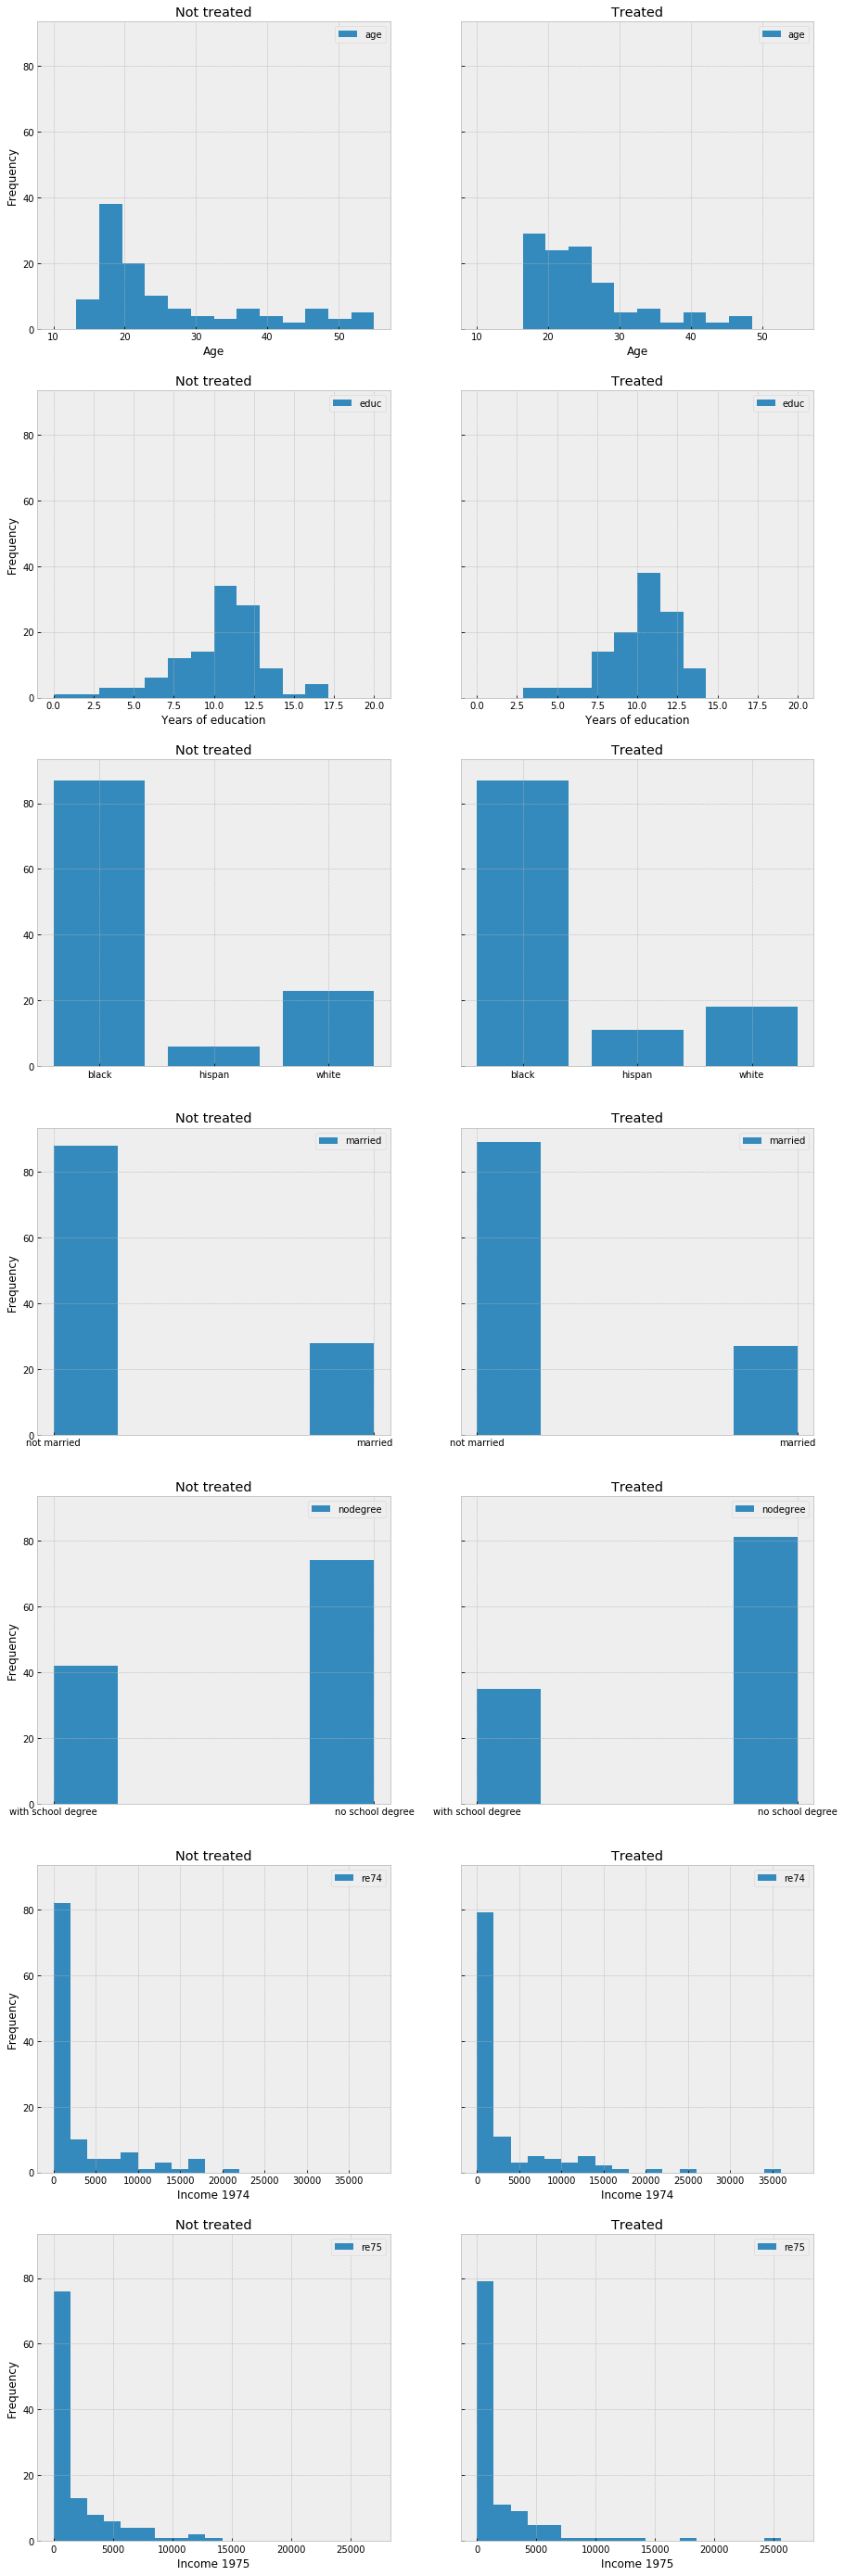

In [48]:
plot_all(treated_matching_2, not_treated_matching_2)

**Conlcusion**: Comparing results to the previuos part, we can see improvements almost to all features. Everything is now more balanced, so we can conclude that we have better matching now.

### 6. A less naive analysis

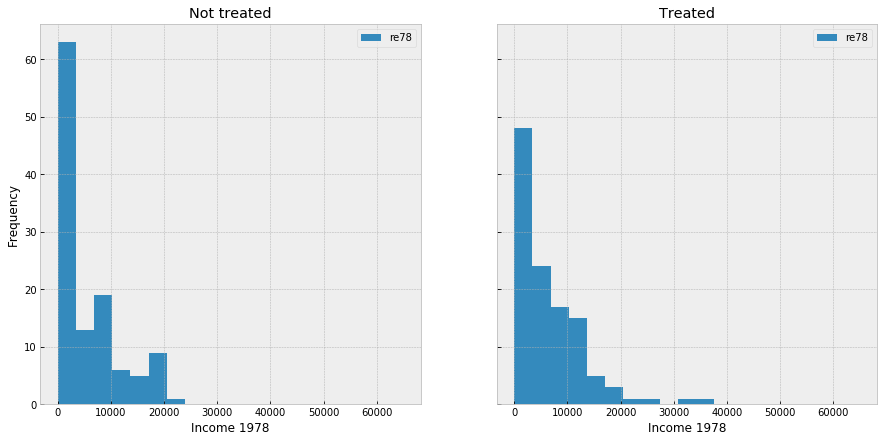

In [49]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Income 1978')
axes[1].set_xlabel('Income 1978')
not_treated_matching_2[['re78']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[0], title='Not treated')
treated_matching_2[['re78']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[1], title='Treated')

In [50]:
descriptions = pd.concat((not_treated_matching_2[['re78']].describe(), treated_matching_2[['re78']].describe()), axis=1)
descriptions.columns = ['Not treated', 'Treated']
descriptions

,Not treated,Treated
count,116.000000,116.000000
mean,5201.368213,6327.632945
std,6182.580743,6912.906502
min,0.000000,0.000000
25%,0.000000,625.264250
50%,2283.087500,4402.275000
75%,8914.754750,9798.811500
max,23764.800000,36646.950000


**Conclusion**: After matching in part 5 and comparing the newly two groups, we can see that the mean income is still higher, and the standard deviation is a little bit higher. So we can conclude that the training program is efective. Maybe there is not such a big effect, but we can clearly see some increases. 

**Bonus**: Maybe the easiest way to see if this training program is effective is just to look at treated group. We just need to compare the income in 1975 to income in 1978.

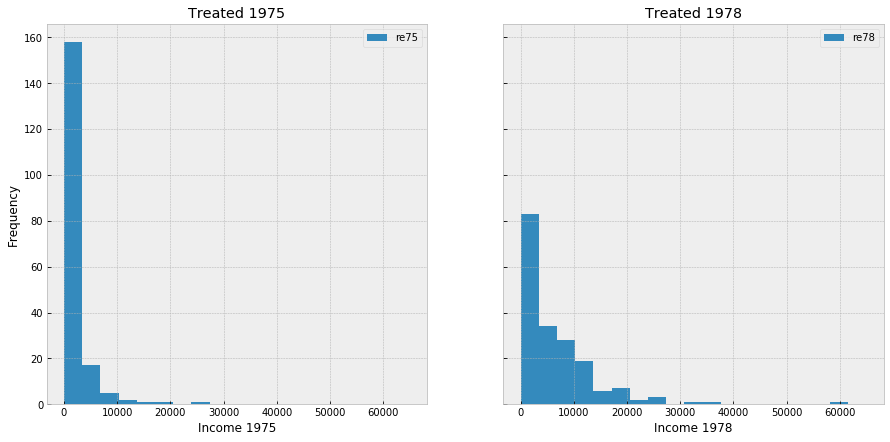

In [51]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 7), sharex=False, sharey=True)
axes[0].set_xlabel('Income 1975')
axes[1].set_xlabel('Income 1978')
treated[['re75']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[0], title='Treated 1975')
treated[['re78']].plot(kind='hist', bins=np.linspace(0, 65000, 20), ax=axes[1], title='Treated 1978')

In [52]:
descriptions = pd.concat((treated[['re75']].describe(), treated[['re78']].describe()), axis=1)
descriptions.columns = ['Treated 1975', 'Treated 1978']
descriptions

,Treated 1975,Treated 1978
count,185.000000,185.000000
mean,1532.055314,6349.143530
std,3219.250870,7867.402218
min,0.000000,0.000000
25%,0.000000,485.229800
50%,0.000000,4232.309000
75%,1817.284000,9642.999000
max,25142.240000,60307.930000


We can clearly see that there is an increase in every aspect.

## Question 2

In this section we will try to create random forest model to predict news text's category by using 20 newsgroup dataset provided by sklearn. 

### 2.1. Preparing the dataset
In this section we have downloaded 20newsgroup dataset from sklearn and calculated tf-idf features to create feature matrix from dataset. And finally, we splitted feature matrix into training (80%), validation (10%) and test (10%) sets by using row indices.

#### 2.1.a. Downloading dataset
We've downloaded 14MB of dataset directly from sklearn using fetch_20newsgroup function provided by sklearn dataset library. The downloaded dataset is sklearn's bunch object which has 11314 texts. However we can see possible close relationship between different groups by their names. For example, talk.religion and soc.religion can have more similar words and thus it might increase false positives of our prediction.

In [3]:
#Getting access to the dataset
import sklearn as sk
from sklearn.datasets import fetch_20newsgroups
data=fetch_20newsgroups()
#Let's see type of document, data size, and target names
print("Data type:{n}".format(n=type(data)))
print("Total number of texts:{n}".format(n=len(data.data)))
print("Target Names:{n}".format(n=data.target_names))

Data type:<class 'sklearn.utils.Bunch'>
Total number of texts:11314
Target Names:['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc', 'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware', 'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles', 'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt', 'sci.electronics', 'sci.med', 'sci.space', 'soc.religion.christian', 'talk.politics.guns', 'talk.politics.mideast', 'talk.politics.misc', 'talk.religion.misc']


#### 2.1.b. Calculating and creating feature matrix
Once we've got the dataset, we have to process the texts and get quantitive meaningful features from them. In this case, we are using tf-idf feature which is multiplication of "Term frequency (tf)" and "Inverse term frequency (idf)". To calculate it using sklearn first we have to count each word's occurences in each text. And then by using TfidfTransformer object we can easily calculate feature matrix for next stages.

In [4]:
#calculating word occurences
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(data.data)
#from occurences creating tf-idf feature matrix
from sklearn.feature_extraction.text import TfidfTransformer
tfidf_transformer = TfidfTransformer()
X_tfidf = tfidf_transformer.fit_transform(X_counts)
X_tfidf.shape

(11314, 130107)

#### 2.1.c. Splitting the data
In order to evaluate our trained model accurately we have to split our dataset into train, validation and test datasets. In this case we will use validation training set to adjust random forest model's parameters for best performance, while test dataset will be used to evaluate final result of our model. Instead of calculating tf-idf on each dataset, we've divided feature matrix rows by indices. You can see lengths of each set's indices

In [5]:
#splittint dataset into training, validation, and testing set
import numpy as np
import random
length=len(data.data)
#sampling 80% of the indices
train_i=random.sample(range(0,length),int(length*0.8))
#removing indices we chose for training
test_i=list(set(range(0,length))-set(train_i))
#and divide leftovers to equal halves to get 10% validation and 10% test set
valid_i=random.sample(test_i,int(len(test_i)*0.5))
test_i=list(set(test_i)-set(valid_i))
#lengths of each set
[len(train_i),len(test_i),len(valid_i)]

[9051, 1132, 1131]

### 2.2. Training and evaluation of Random Forest model
In this section we're going to discuss training of random forest model, parameter optimization, result and feature importance.

#### 2.2.a. Random Forest
Random Forest algorithm is ensemble model which consists of multiple number of estimators (n_estimator) each of which is trained on random samples of training dataset. Thus, increase in number of estimators won't lead to overfitting while max_depth of each decision tree can hurt performance. In the following code we've tested RandomForestClassifier with default training parameters (n_estimators=10, max_depth=None). As expected validation and test set prediction result is not very different, but 0.62 is very poor performance.

In [6]:
#loading library for RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
#training model with default settings
forest=RandomForestClassifier().fit(X_tfidf[train_i],data.target[train_i])
#testing trained model on validation and test dataset
val_pred=forest.predict(X_tfidf[valid_i])
test_pred=forest.predict(X_tfidf[test_i])
#calculating average performance (correct classification rate)
[np.mean(val_pred==data.target[valid_i]),np.mean(test_pred==data.target[test_i])]

[0.62422634836427937, 0.68639575971731448]

#### 2.2.b. Parameter Optimization
In this section we will adjust n_estimators and max_depths to train model with best parameters. In order to do so, we are using grid search and compare trained models by their prediction performance on validation dataset.

In [67]:
#declaring grid search range and parameters
n_estimators=[200,300,400]
max_depths=[200,150,125,100,75,50,10]
#variable to store best combination
best=(0,(10,10))
#variable to store log
results=[]
for n in n_estimators:
    row=[]
    for m in max_depths:
        #for each combination of 2 parameters train random forest model
        forest=RandomForestClassifier(n_estimators=n,max_depth=m).fit(X_tfidf[train_i],data.target[train_i])
        #predict validation dataset using trained model
        val_pred=forest.predict(X_tfidf[valid_i])
        #save the average correct prediction rate
        result=np.mean(val_pred==data.target[valid_i])
        #keeping the best result for each iteration
        if(result>best[0]):
            best=(result,(n,m))
        #printing log
        print("Valid result:{v}, n:{n}, m:{m}".format(v=result,n=n,m=m))
        row.append(result)
    results.append(row)
print(best)

Valid result:0.8594164456233422, n:200, m:200
Valid result:0.8585322723253758, n:200, m:150
Valid result:0.8558797524314765, n:200, m:125
Valid result:0.847922192749779, n:200, m:100
Valid result:0.8443854995579133, n:200, m:75
Valid result:0.843501326259947, n:200, m:50
Valid result:0.735632183908046, n:200, m:10
Valid result:0.8594164456233422, n:300, m:200
Valid result:0.8638373121131742, n:300, m:150
Valid result:0.8541114058355438, n:300, m:125
Valid result:0.8532272325375774, n:300, m:100
Valid result:0.8426171529619806, n:300, m:75
Valid result:0.8390804597701149, n:300, m:50
Valid result:0.7427055702917772, n:300, m:10
Valid result:0.865605658709107, n:400, m:200
Valid result:0.870026525198939, n:400, m:150
Valid result:0.8585322723253758, n:400, m:125
Valid result:0.8558797524314765, n:400, m:100
Valid result:0.847922192749779, n:400, m:75
Valid result:0.8390804597701149, n:400, m:50
Valid result:0.7427055702917772, n:400, m:10
(0.87002652519893897, (400, 150))


In above, we can see log of grid search but let's visualize it anyway (for more points :) ).

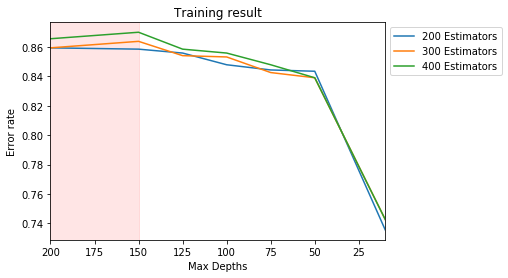

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
#creating dataset to display our log
d = {'Max Depths':max_depths,'200 Estimators': results[0], '300 Estimators': results[1], '400 Estimators': results[2]}
df = pd.DataFrame(data=d)
#plotting it
ax = df.plot(x='Max Depths',title="Training result")
ax.set_ylabel("Error rate")
ax.legend(bbox_to_anchor=(1, 1))
#highlighting overfit
plt.axvspan(200, 150, color='red', alpha=0.1)
plt.show()

From the graph above we can see multiple relations. In general, model performance increases as number of estimators increase. And also we can observe overfitting in Max_Depths=[200,150], where validation performance drops. Thus the best parameters to train our model according to our grid search is (n_estimators=400, max_depth=150).

#### 2.2.c. Test result evaluation
In this section, we will study how well our trained model performed in test dataset. In order to do that, first we've trained random forest with our best parameters and saved it's prediction on test dataset. And then, created confusion matrix

In [7]:
#training our model with best parameters and predicting test dataset
from sklearn.metrics import confusion_matrix
forest=RandomForestClassifier(n_estimators=400,max_depth=150).fit(X_tfidf[train_i],data.target[train_i])
test_pred=forest.predict(X_tfidf[test_i])

In [8]:
#computing average correct prediction rate and confusion matrix
conf_arr=confusion_matrix(data.target[test_i],test_pred)
np.mean(test_pred==data.target[test_i])

0.87279151943462896

Technically, we have our confusion matrix, but let's add some color to it (for more points :) )

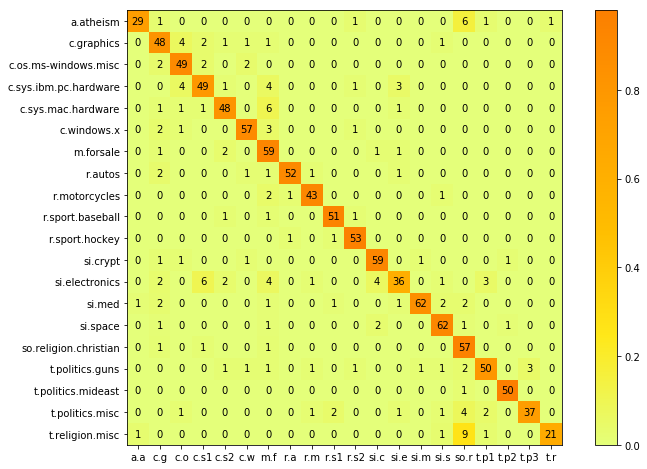

In [22]:
#plotting confusion matrix
#normalizing matrix for color assignment
norm_conf = []
for i in conf_arr:
    a = 0
    tmp_arr = []
    a = sum(i, 0)
    for j in i:
        tmp_arr.append(float(j)/float(a))
    norm_conf.append(tmp_arr)
#setting up the plot and it's size
fig = plt.figure(figsize=(12,8))
plt.clf()
ax = fig.add_subplot(111)
ax.set_aspect(1)
#adding color to matrix
res = ax.imshow(np.array(norm_conf), cmap=plt.get_cmap('Wistia'), interpolation='nearest')
#combining the matrix
width, height = conf_arr.shape
for x in range(width):
    for y in range(height):
        ax.annotate(str(conf_arr[x][y]), xy=(y, x), 
                    horizontalalignment='center',
                    verticalalignment='center')
#colorbar to show our measurements
cb = fig.colorbar(res)
#y ticks
namesy = ['a.atheism',
 'c.graphics',
 'c.os.ms-windows.misc',
 'c.sys.ibm.pc.hardware',
 'c.sys.mac.hardware',
 'c.windows.x',
 'm.forsale',
 'r.autos',
 'r.motorcycles',
 'r.sport.baseball',
 'r.sport.hockey',
 'si.crypt',
 'si.electronics',
 'si.med',
 'si.space',
 'so.religion.christian',
 't.politics.guns',
 't.politics.mideast',
 't.politics.misc',
 't.religion.misc']
# x ticks
namesx=['a.a','c.g','c.o','c.s1','c.s2','c.w','m.f','r.a','r.m','r.s1','r.s2','si.c','si.e','si.m','si.s','so.r','t.p1','t.p2','t.p3','t.r']
plt.xticks(range(width), namesx)
plt.yticks(range(height), namesy)
plt.savefig('confusion_matrix.png', format='png')
plt.show()

From the graph we can see our trained model worked pretty well. And also, as we predicted, talk.religion and soc.religion.christian groups are difficult to distinguish, which makes talk.religion the most hard group to classify.

#### 2.2.d. Feature importance
In this section we will analyze how helpful each features are to group texts.

Before plotting anything let's look at basic description of feature importance vector.

In [13]:
i=forest.feature_importances_
print("Feature importances")
print("Length:{l}, Mean:{m}, std:{s}, Num of Zeroes:{z}".format(l=len(i),m=np.mean(i),s=np.std(i),z=np.mean(i==0)))

Feature importances
Length:130107, Mean:7.685981538272345e-06, std:6.591402453264854e-05, Num of Zeroes:0.5059989085906216


As you can see, perhaps due to large number of features, significance of each feature is very low. Moreover, almost half of the features has 0 importance on prediction and such high standard deviation suggests only small fraction of features have impact on our prediction. 
Since plotting importance vector without preprocessing won't tell us new information, we've sorted our result and then interested in only 49 percent with highest importance in logarithmic scale to avoid features with zero importance.

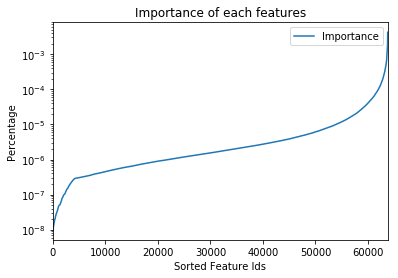

In [34]:
ip=np.sort(i)[int(len(i)*0.51):]
d = {'Sorted Feature Ids':range(len(ip)),'Importance': ip}
df = pd.DataFrame(data=d)
ax = df.plot(x='Sorted Feature Ids',title="Importance of each features",logy=True)
ax.set_ylabel("Percentage")
ax.legend(bbox_to_anchor=(1, 1))
plt.show()

From the result above we can conlude that news text consists of mainly from common words and tiny fraction determines it's content. Now let's try to measure their percentages.

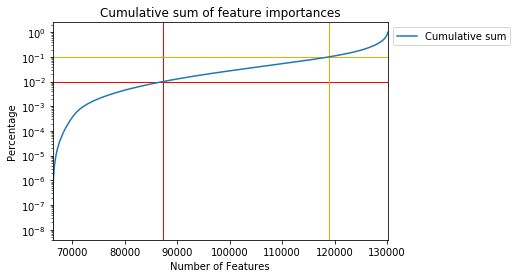

In [50]:
#calculating the cumulative sum
cum=np.cumsum(np.sort(ip))
#finding points were cumulative sum reaches 90 and 99 percent
p90=np.sum(cum>1e-1)
p99=np.sum(cum>1e-2)
d = {'Number of Features':range((len(i)-len(cum)),len(i)),'Cumulative sum': cum}
df = pd.DataFrame(data=d)
ax = df.plot(x='Number of Features',title="Cumulative sum of feature importances",logy=True)
ax.set_ylabel("Percentage")
ax.legend(bbox_to_anchor=(1, 1))
#highlightin 99% and 90% points
plt.axhspan(1e-2, 1e-2, color='red', alpha=1)
plt.axvspan(len(i)-p99, len(i)-p99, color='red', alpha=1)
plt.axhspan(1e-1, 1e-1, color='orange', alpha=1)
plt.axvspan(len(i)-p90, len(i)-p90, color='orange', alpha=1)
plt.show()

In [52]:
print("90 percent:{p90} ; 99 percent:{p99}".format(p90=p90/len(i),p99=p99/len(i)))

90 percent:0.08636737454556634 ; 99 percent:0.32954414443496505


From the graph above based on cumulative sum, we can conclude that only 8.6% of the word is responsible for 90 percent of it's content type and 32.9% is for 99 percent.